In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.impute import  SimpleImputer

In [35]:
from function import load_dataset, load_csv,split_train_test

In [36]:
load_dataset()
data = load_csv()

In [37]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [39]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [40]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


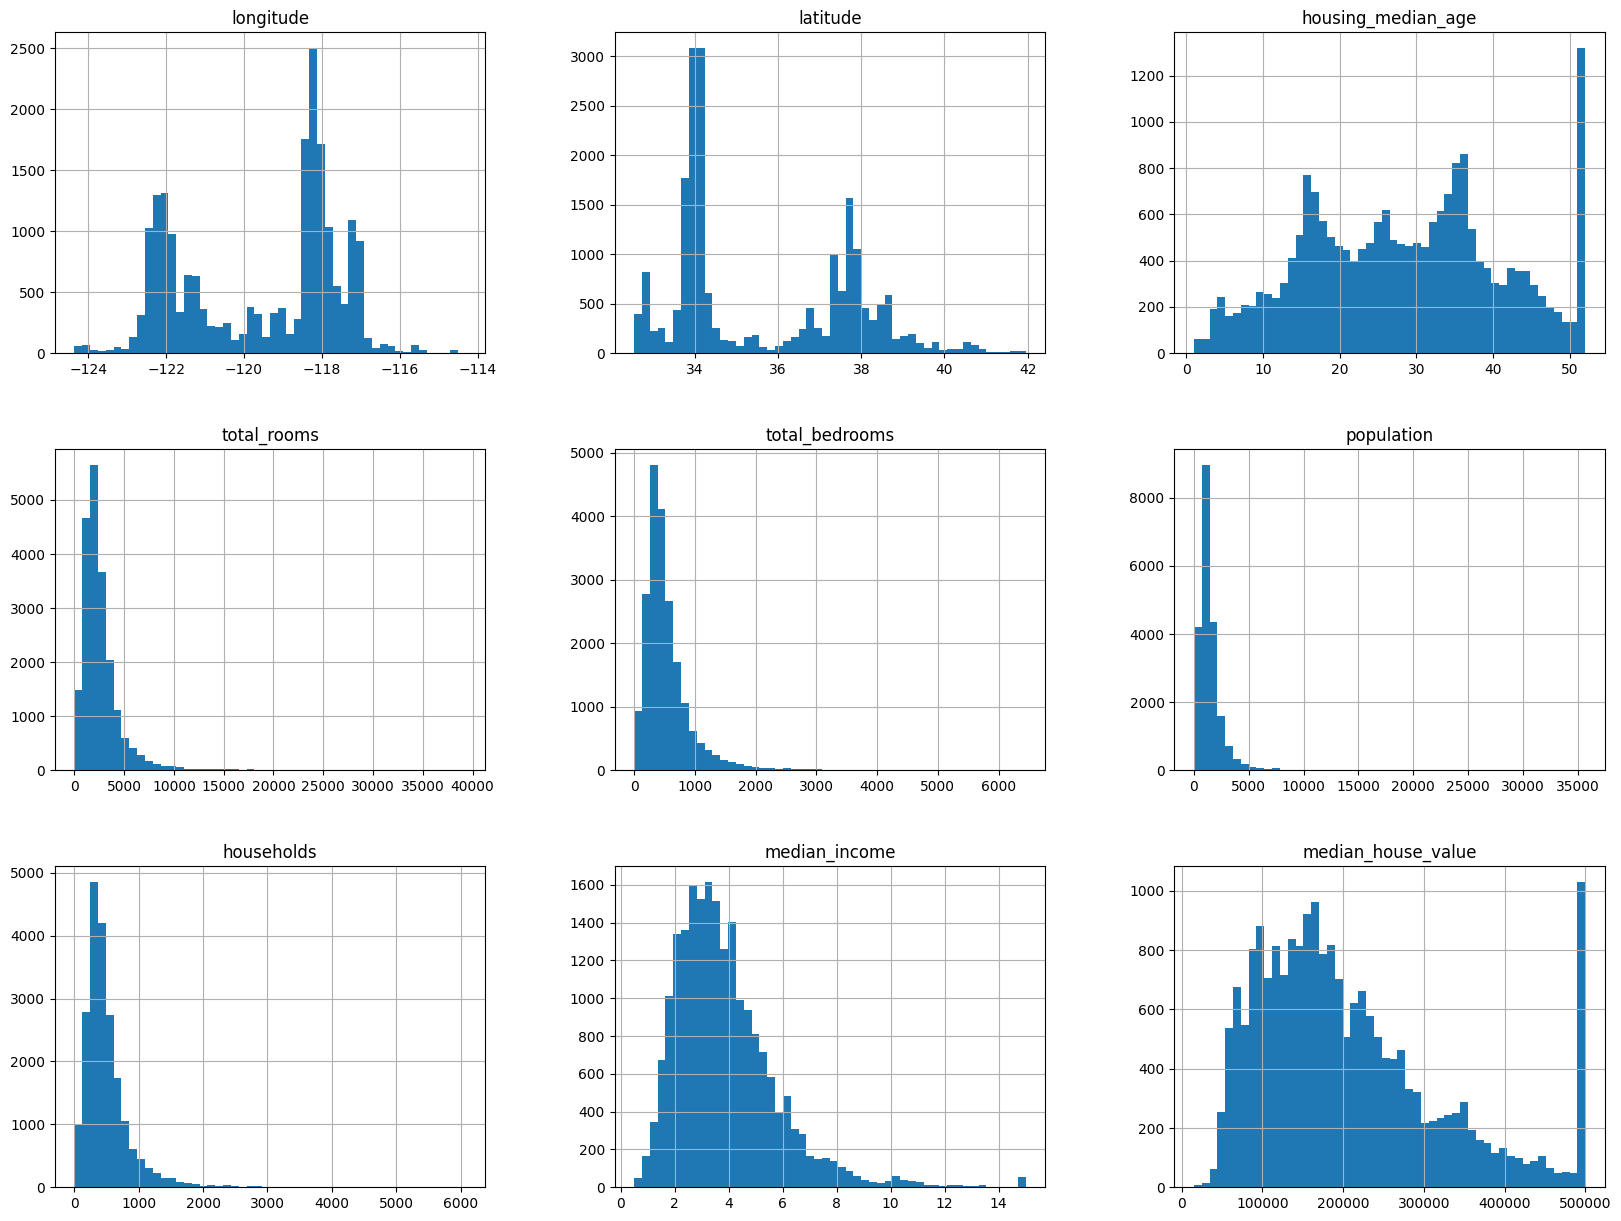

In [41]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

In [42]:
data['median_income']=data['median_income']*10000 #1=10000

In [43]:
data.duplicated().sum()

0

In [44]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [45]:
data[data['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,43750.0,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,16196.0,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,25762.0,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,49489.0,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,39063.0,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,33409.0,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,16953.0,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,51033.0,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,66073.0,258100.0,<1H OCEAN


In [46]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,84700.0,INLAND


In [47]:
train,test = split_train_test(data,0.2)

(16512, 4128)

In [52]:
train_data, test_data = train_test_split(data, test_size=0.2,random_state=42)

<Axes: >

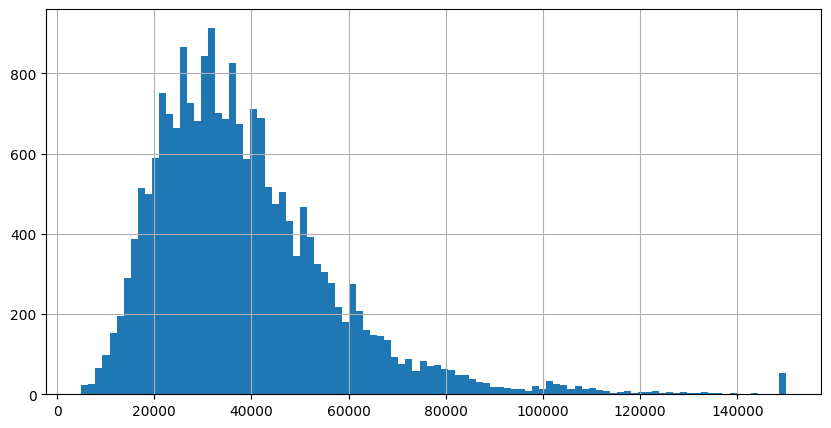

In [66]:
data['median_income'].hist(bins=100, figsize=(10,5))

In [81]:
data['median_income'].describe()

count     20640.000000
mean      38706.710029
std       18998.217179
min        4999.000000
25%       25634.000000
50%       35348.000000
75%       47432.500000
max      150001.000000
Name: median_income, dtype: float64

In [91]:
data['income_cut']=pd.cut(data['median_income'],bins=[0,15000,30000,45000,60000,np.inf], labels=[1,2,3,4,5])

<Axes: >

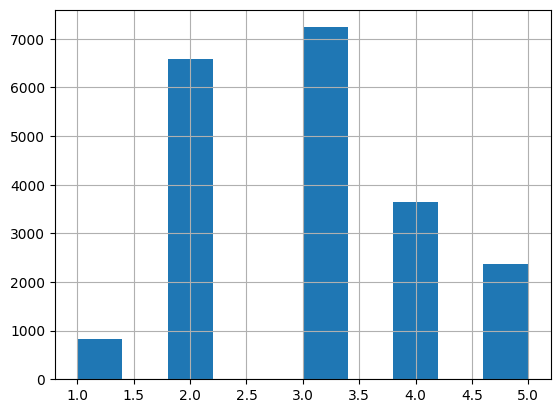

In [93]:
data['income_cut'].hist()

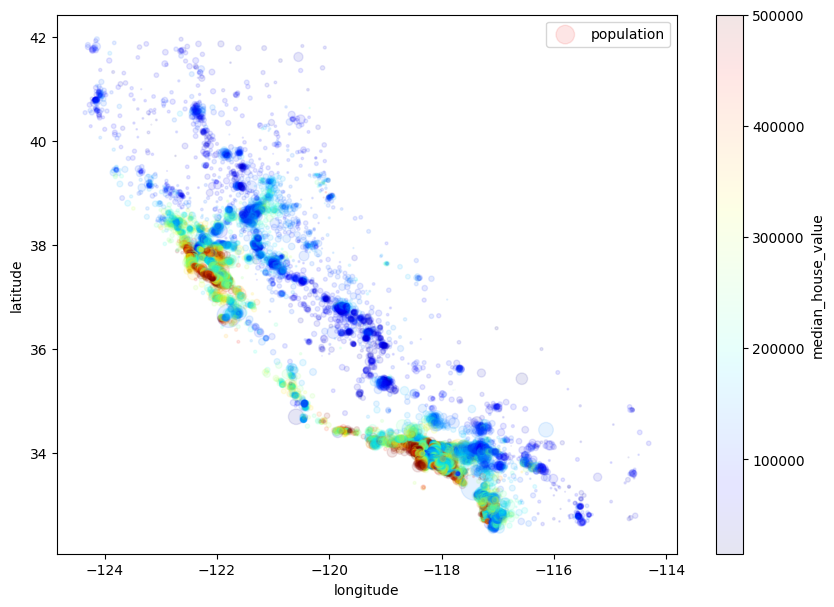

In [123]:
data.plot(kind='scatter', 
        x='longitude',
        y='latitude', 
        alpha=0.1, 
        s=data['population']/100,
        label='population', 
        figsize=(10,7), 
        c='median_house_value', 
        cmap=plt.get_cmap('jet'),
        colorbar=True)
plt.legend();

In [167]:
data.loc[:, ~data.columns.isin(['ocean_proximity'])].corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cut            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [188]:
#pd.plotting.scatter_matrix(data.loc[:, ~data.columns.isin(['ocean_proximity'])], figsize=(50,50));

<Axes: xlabel='median_income', ylabel='median_house_value'>

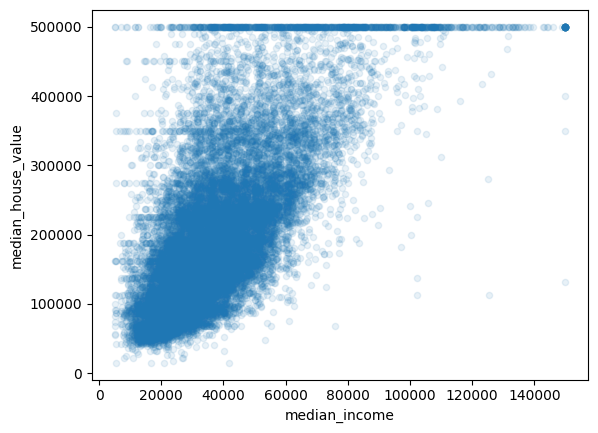

In [189]:
data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [185]:
data['rooms_per_household'] = data['total_rooms']/data['households']
data['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']

In [190]:
train_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [191]:
test_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [199]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(train_data.loc[:,train_data.columns!='ocean_proximity'])


SimpleImputer()

In [200]:
imputer.statistics_

array([-1.19582290e+02,  3.56431492e+01,  2.86082849e+01,  2.64200478e+03,
        5.38496851e+02,  1.42645300e+03,  4.99986919e+02,  3.88075426e+04,
        2.07194694e+05])